# train dataset preview 
## describe


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv(f'../datasets/dataset_train.csv')
df.head()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [3]:
df.tail()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81
1599,1599,Hufflepuff,Kylie,Nowak,2000-08-21,Left,48639.0,688.911989,5.421046,-6.889120,6.593,-234.207911,339.775154,7.208415,1034.928004,2.052215,0.150532,-244.02063,-54.77


In [4]:
df.select_dtypes(include=np.number)

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [5]:
# remove index col
df[df.columns[1:]].describe()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [6]:
df[df.select_dtypes(include=np.number).columns[1:]].mean()

Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

In [7]:
df[df.select_dtypes(include=np.number).columns[1:]].isna().sum()

Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense Against the Dark Arts    31
Divination                       39
Muggle Studies                   35
Ancient Runes                    35
History of Magic                 43
Transfiguration                  34
Potions                          30
Care of Magical Creatures        40
Charms                            0
Flying                            0
dtype: int64

In [8]:
df[df.select_dtypes(include=np.number).columns[1:]].count()

Arithmancy                       1566
Astronomy                        1568
Herbology                        1567
Defense Against the Dark Arts    1569
Divination                       1561
Muggle Studies                   1565
Ancient Runes                    1565
History of Magic                 1557
Transfiguration                  1566
Potions                          1570
Care of Magical Creatures        1560
Charms                           1600
Flying                           1600
dtype: int64

In [9]:
df_num = df[df.select_dtypes(include=np.number).columns[1:]]
df_num.head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [10]:
def describing(arr:np.ndarray):
    return np.mean(arr)

df_num.agg(lambda course:describing(course))

Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

Apply a function along input axis of DataFrame

In [11]:
df_num.apply(np.mean) #axis=0

Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

### Aggregate
DataFrame.aggregate(func=None, axis=0, *args, **kwargs)[source]

Aggregate using one or more operations over the specified axis.

Parameters:

    funcfunction, str, list or dict

        Function to use for aggregating the data. If a function, must either work when passed a DataFrame or when passed to DataFrame.apply.

        Accepted combinations are:

            function

            string function name

            list of functions and/or function names, e.g. [np.sum, 'mean']

            dict of axis labels -> functions, function names or list of such.


(pd.aggregate)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html#pandas.DataFrame.aggregate]

In [12]:
def describing(arr:np.ndarray):
    return np.mean(arr)

serie_mean = df_num.agg(lambda course:describing(course))

In [13]:
def quantile_25(x):
    return x.quantile(0.25)

def quantile_50(x):
    return x.quantile(0.5)

def quantile_75(x):
    return x.quantile(0.25)

def nan_count(x):
    return x.isna().sum()

df_num.agg(['count', nan_count, 'mean', 'std', 'min',
            quantile_25, quantile_50, quantile_75, 'max'])

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
nan_count,34.000000,32.000000,33.000000,31.000000,39.000000,35.000000,35.000000,43.000000,34.000000,30.000000,40.000000,0.000000,0.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
quantile_25,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
quantile_50,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
quantile_75,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


#### Datascience X Logistic Regression Harry Potter and a Data Scientist
It is forbidden to use any function that makes the job done for you
like: count, mean, std, min, max, percentile, etc... no matter the
language that you use. Of course, it is also forbidden to use the
describe library or any function that looks similar(more or less) to
it from another library.

In [14]:
# class Describer:
#     """ DataFrame.describe """
#     def __init__(self, x:pd.Series):
#         self.course = x.keys()
#         print("key", x.keys())
#         self.ar = x.to_numpy()
    
#     def __str__(self) -> str:
#         str = f'{self.course}'
#         str += 'Describer.s_count()'
#         str += 'Describer.s_mean()'
#         return str

#     @staticmethod
#     def s_count(arr: np.ndarray):
#         return len(arr)
    
#     @staticmethod
#     def s_mean(arr: np.ndarray):
#         sum = 0
#         for n in range(arr):
#             sum += n
#         return sum / len(Describer.s_mean())

# for key in df_num.keys():
#     series_describer = Describer(df_num[key])
#     print(series_describer)

In [15]:
for key in df_num.keys():
    print(key, df_num[key].mean())

Arithmancy 49634.57024265645
Astronomy 39.79713089016475
Herbology 1.1410195296768046
Defense Against the Dark Arts -0.38786349744178633
Divination 3.1539096732863547
Muggle Studies -224.58991486346417
Ancient Runes 495.74797005915786
History of Magic 2.9630946151165936
Transfiguration 1030.0969463871306
Potions 5.950372992780089
Care of Magical Creatures -0.0534271367004963
Charms -243.3744090125
Flying 21.9580125


In [16]:
def describe_series(ser: pd.Series):
    ser.dropna()
    arr = np.array(ser)
    return len(arr)

df_num.apply(lambda x: describe_series(x))

Arithmancy                       1600
Astronomy                        1600
Herbology                        1600
Defense Against the Dark Arts    1600
Divination                       1600
Muggle Studies                   1600
Ancient Runes                    1600
History of Magic                 1600
Transfiguration                  1600
Potions                          1600
Care of Magical Creatures        1600
Charms                           1600
Flying                           1600
dtype: int64

In [17]:
df['Hogwarts House']

0        Ravenclaw
1        Slytherin
2        Ravenclaw
3       Gryffindor
4       Gryffindor
           ...    
1595    Gryffindor
1596     Slytherin
1597    Gryffindor
1598    Hufflepuff
1599    Hufflepuff
Name: Hogwarts House, Length: 1600, dtype: object

### plots

Affichage avec la bibliothèque graphique intégrée à Notebook

```%matplotlib inline```

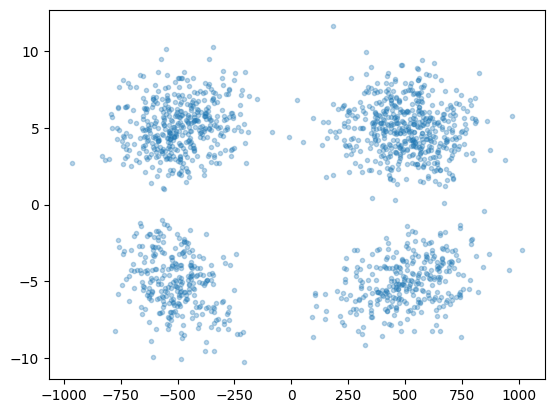

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

house = df.keys()[1]
plt.scatter('Astronomy', 'Herbology', marker='.', alpha=0.3, data=df)
plt.show()

In [19]:
group1_mean = df.groupby('Hogwarts House')['Astronomy'].mean()
print("Astronomy", group1_mean)

group2_mean = df.groupby('Hogwarts House')['Herbology'].mean()
print("Herbology", group2_mean)

Astronomy Hogwarts House
Gryffindor    493.336646
Hufflepuff    497.708002
Ravenclaw    -480.043083
Slytherin    -496.333927
Name: Astronomy, dtype: float64
Herbology Hogwarts House
Gryffindor   -4.783906
Hufflepuff    4.919408
Ravenclaw     5.021857
Slytherin    -4.775624
Name: Herbology, dtype: float64


Hogwarts House
Gryffindor    Axes(0.125,0.11;0.775x0.77)
Hufflepuff    Axes(0.125,0.11;0.775x0.77)
Ravenclaw     Axes(0.125,0.11;0.775x0.77)
Slytherin     Axes(0.125,0.11;0.775x0.77)
Name: Astronomy, dtype: object

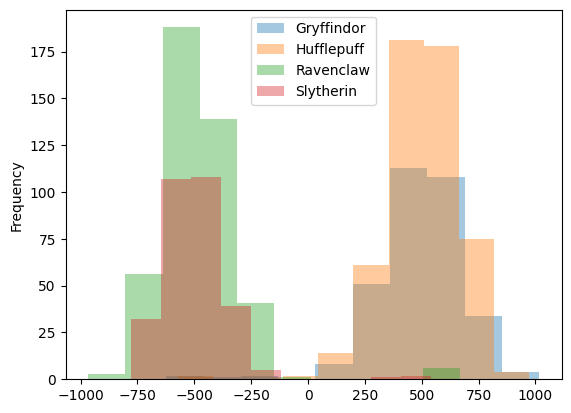

In [20]:
df_ast = df.groupby('Hogwarts House')['Astronomy']
df_ast.plot(kind='hist', alpha=0.4, legend=True)

Hogwarts House
Gryffindor    Axes(0.125,0.11;0.775x0.77)
Hufflepuff    Axes(0.125,0.11;0.775x0.77)
Ravenclaw     Axes(0.125,0.11;0.775x0.77)
Slytherin     Axes(0.125,0.11;0.775x0.77)
Name: Herbology, dtype: object

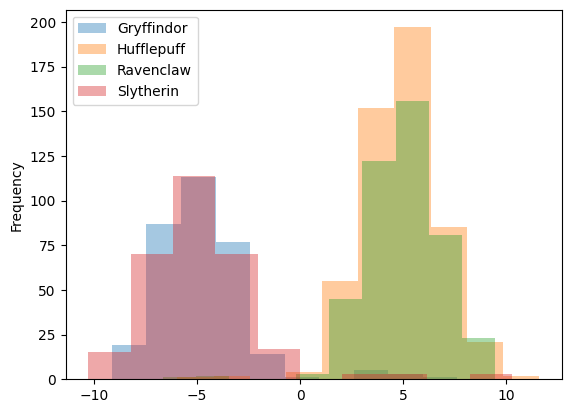

In [21]:
df_herb = df.groupby('Hogwarts House')['Herbology']
df_herb.plot(kind='hist', alpha=0.4, legend=True)

https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html#sphx-glr-tutorials-intermediate-constrainedlayout-guide-py

In [22]:

# ### remove non num
# fig, ax = plt.subplots(ncol=2, nrow=1, figsize=(10,4))
# i = 0
# courses = ['Astrology'] #, 'Herbology']
# for course in courses:
#     d_course = df.groupby('Hogwarts House')[course]
#     ax[0].plot(d_course, alpha=0.4)
#     i += 1
# ax.legend()
# plt.show()

fig, ax = plt.subplots(ncol=1, nrow=1, figsize=(10,4))
ax.plot.hist(column=df.groupby('Hogwarts House')['Astrology'], alpha=0.4)
# ax[1].plot.hist(column=df.groupby('Hogwarts House')['Herbology'], alpha=0.4)
ax.legend()
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'ncol'